 # Fruit Classification with Decision Tree Supervised Learning

In [81]:
import sys
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


 ### Load Dataset to train the system


In [82]:
fruits = pd.read_table('../data/fruit_data_with_colors.txt')

#### Create a mapping from fruit label value to fruit name to make results easier to interpret

In [83]:
# color_score: 1-> Red, 0-> Violet
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
print (lookup_fruit_name)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


#### Print dataset

In [84]:
# color_score: 1-> Red, 0-> Violet
print (fruits)

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

 ## Create Train and Test Datasets


 ### Define features X and labels y
 ### Use the mass, width,  height and color_score features (X) of each fruit instance (y)


In [85]:
X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

 ### Train dataset and Test dataset test split, using default 75% / 25%


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Train dataset 3D scatter plot
### * Suppose density=constant for each kind of fruit -> mass, width and  height are related m=dxV-> subs mass by color_score

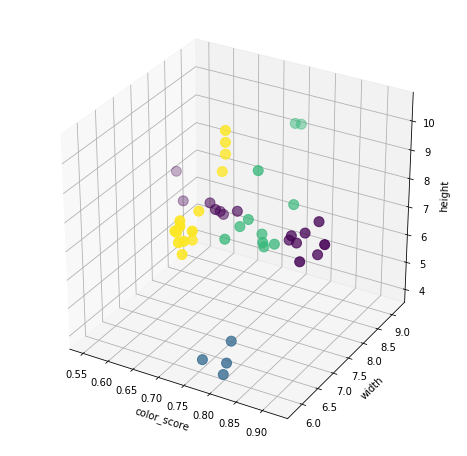

In [87]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['color_score'], X_train['width'], X_train['height'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('color_score')
ax.set_ylabel('width')
ax.set_zlabel('height')
plt.show()


## Configure, train and test ML algorithm, Decision Tree

### Create classifier DT object

In [88]:
dt = DecisionTreeClassifier(max_depth=2)

### Train the classifier, (fit the estimator) using the training dataset

In [89]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Test the classfier, estimate the accuracy of the classifier on future data, using the test dataset

In [90]:
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = dt.predict(X_test)

Accuracy of DT classifier on training set: 0.80
Accuracy of DT classifier on test set: 0.53


### Confusion matrix

Confusion matrix, without normalization
[[1 0 3 0]
 [0 0 1 0]
 [1 0 5 2]
 [0 0 0 2]]


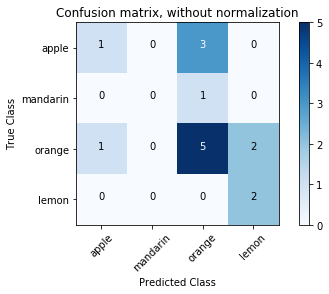

In [91]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    
# Plot the confusion matrix using the provided functions.
class_labels = lookup_fruit_name.values()
model_cm = confusion_matrix(y_true=y_test, y_pred=pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels,title='Confusion matrix, without normalization', normalize=False)
## Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(model_cm, classes=class_labels,title='Confusion matrix, normalized', normalize=True)
plt.show()


### Print Decision Tree

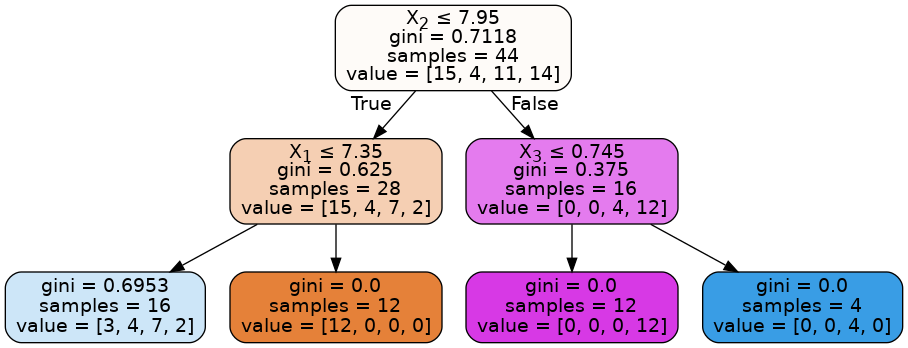

In [92]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Classify new unseen data

### First example: a small fruit with mass 90g, width 4.3 cm, height 5.5 cm, color_score=0.70

In [93]:
fruit_prediction = dt.predict([[90, 4.3, 5.5, 0.79]])
lookup_fruit_name[fruit_prediction[0]]
print "Prediction for mass=90, width=4.3, height=5.5, color_score=0.79: ==> " + str (lookup_fruit_name[fruit_prediction[0]])


Prediction for mass=90, width=4.3, height=5.5, color_score=0.79: ==> orange


### Second example: a larger, elongated fruit with mass 150g, width 7.3 cm, height 7.5 cm, color_score=0.63

In [94]:
fruit_prediction = dt.predict([[150, 7.3, 7.5, 0.63]])
lookup_fruit_name[fruit_prediction[0]]
print "Prediction for mass=150, width=7.3, height=7.5, color_score=0.63: ==> " + str (lookup_fruit_name[fruit_prediction[0]])

Prediction for mass=150, width=7.3, height=7.5, color_score=0.63: ==> orange


## Tune DT algorithm

### How sensitive is DT classification accuracy to the choice of the 'max_depth' parameter?

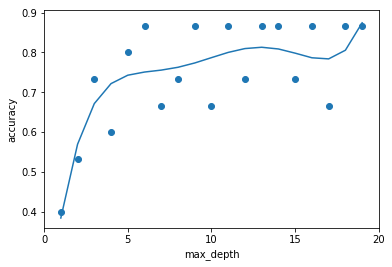

In [95]:
md_range = range(1,20)
scores = []

for md in md_range:
    dt = DecisionTreeClassifier(max_depth=md)
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test, y_test))

plt.figure()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.scatter(md_range, scores)
plt.plot(np.unique(md_range), np.poly1d(np.polyfit(md_range, scores, 5))(np.unique(md_range)))
plt.xticks([0,5,10,15,20]);
plt.show()

### How sensitive is DT classification accuracy to the train/test split proportion?

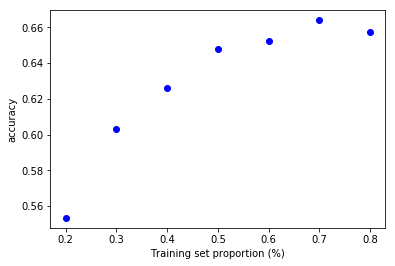

In [96]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

dt = DecisionTreeClassifier(max_depth=2)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        dt.fit(X_train, y_train)
        scores.append(dt.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.show()
